In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

In [2]:
import numpy as np
out_arr = np.full((4,19),-np.inf,dtype=object)

***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: 0886070501_M239grpspec.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  9.032e-04 +/- 3.589e-04 (42.1 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-4
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 1.91e+04 sec
 Using fit statistic: chi
 Using Background File                0886070501_M239spec_bkg.fits
  Background Exposure Time: 1.91e+04 sec
 Using Response (RMF) File            0886070501_M239spec.rmf for Source 1
 Using Auxiliary Response (ARF) File  0886070501_M239spec.arf



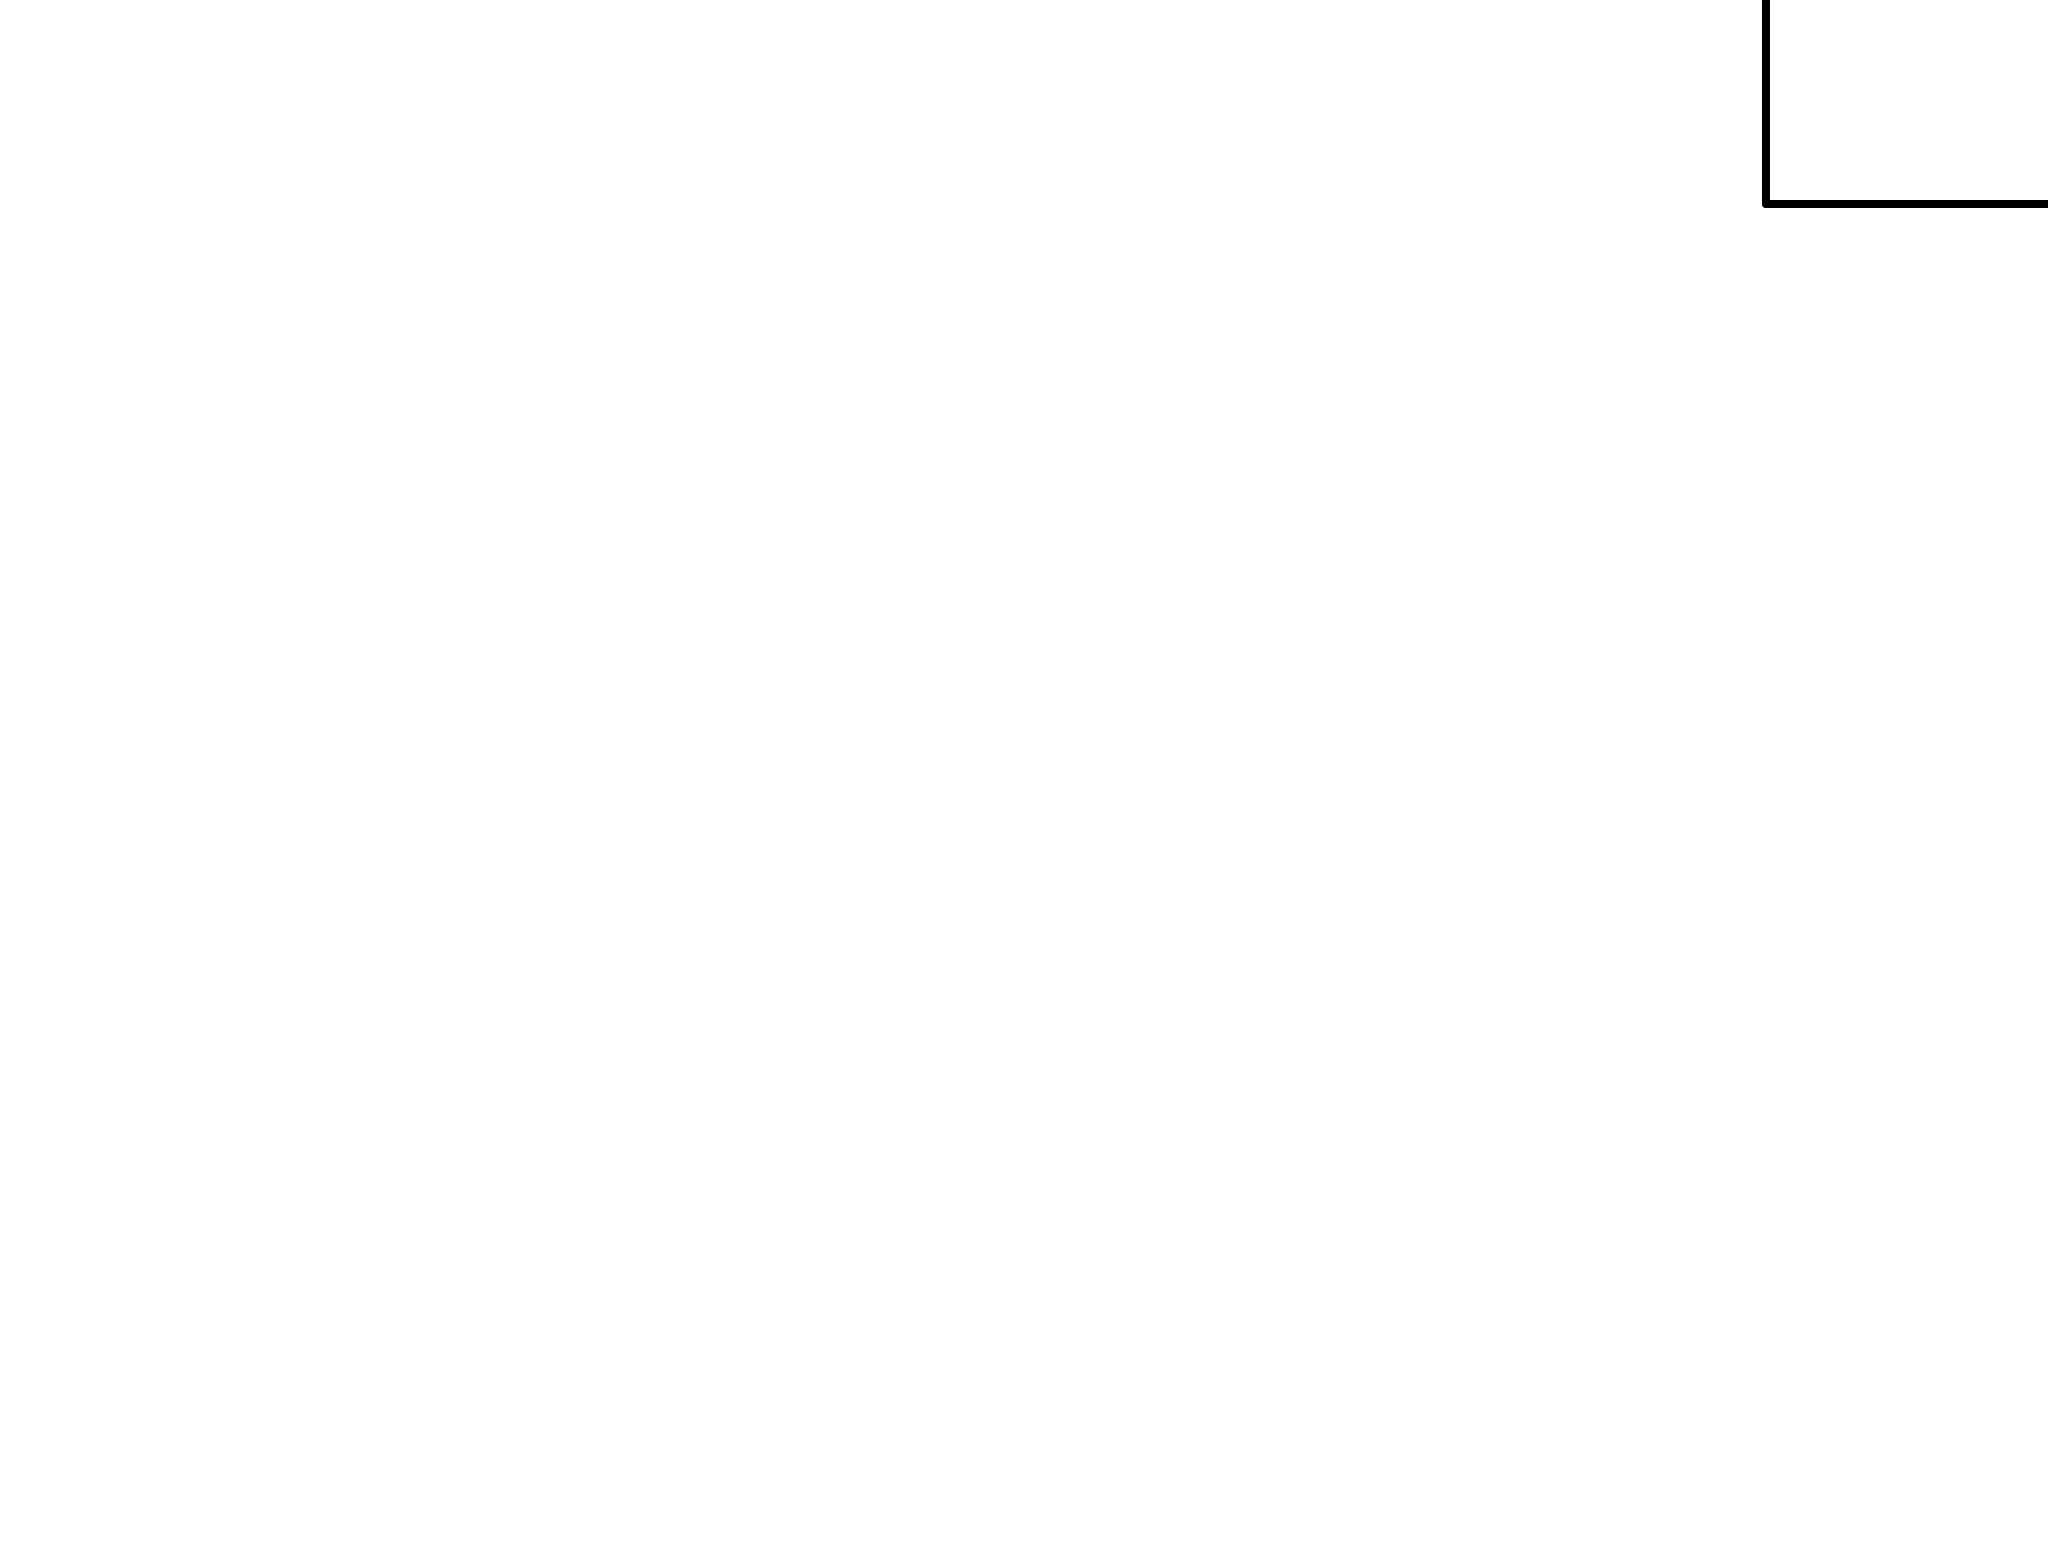

In [3]:
spec_fnames = glob.glob('*grpspec*')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.0005")
Plot("data")
#spec.ignore("**-0.2 12.0-**")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              4.527430e+11     using 4 bins.

Tes

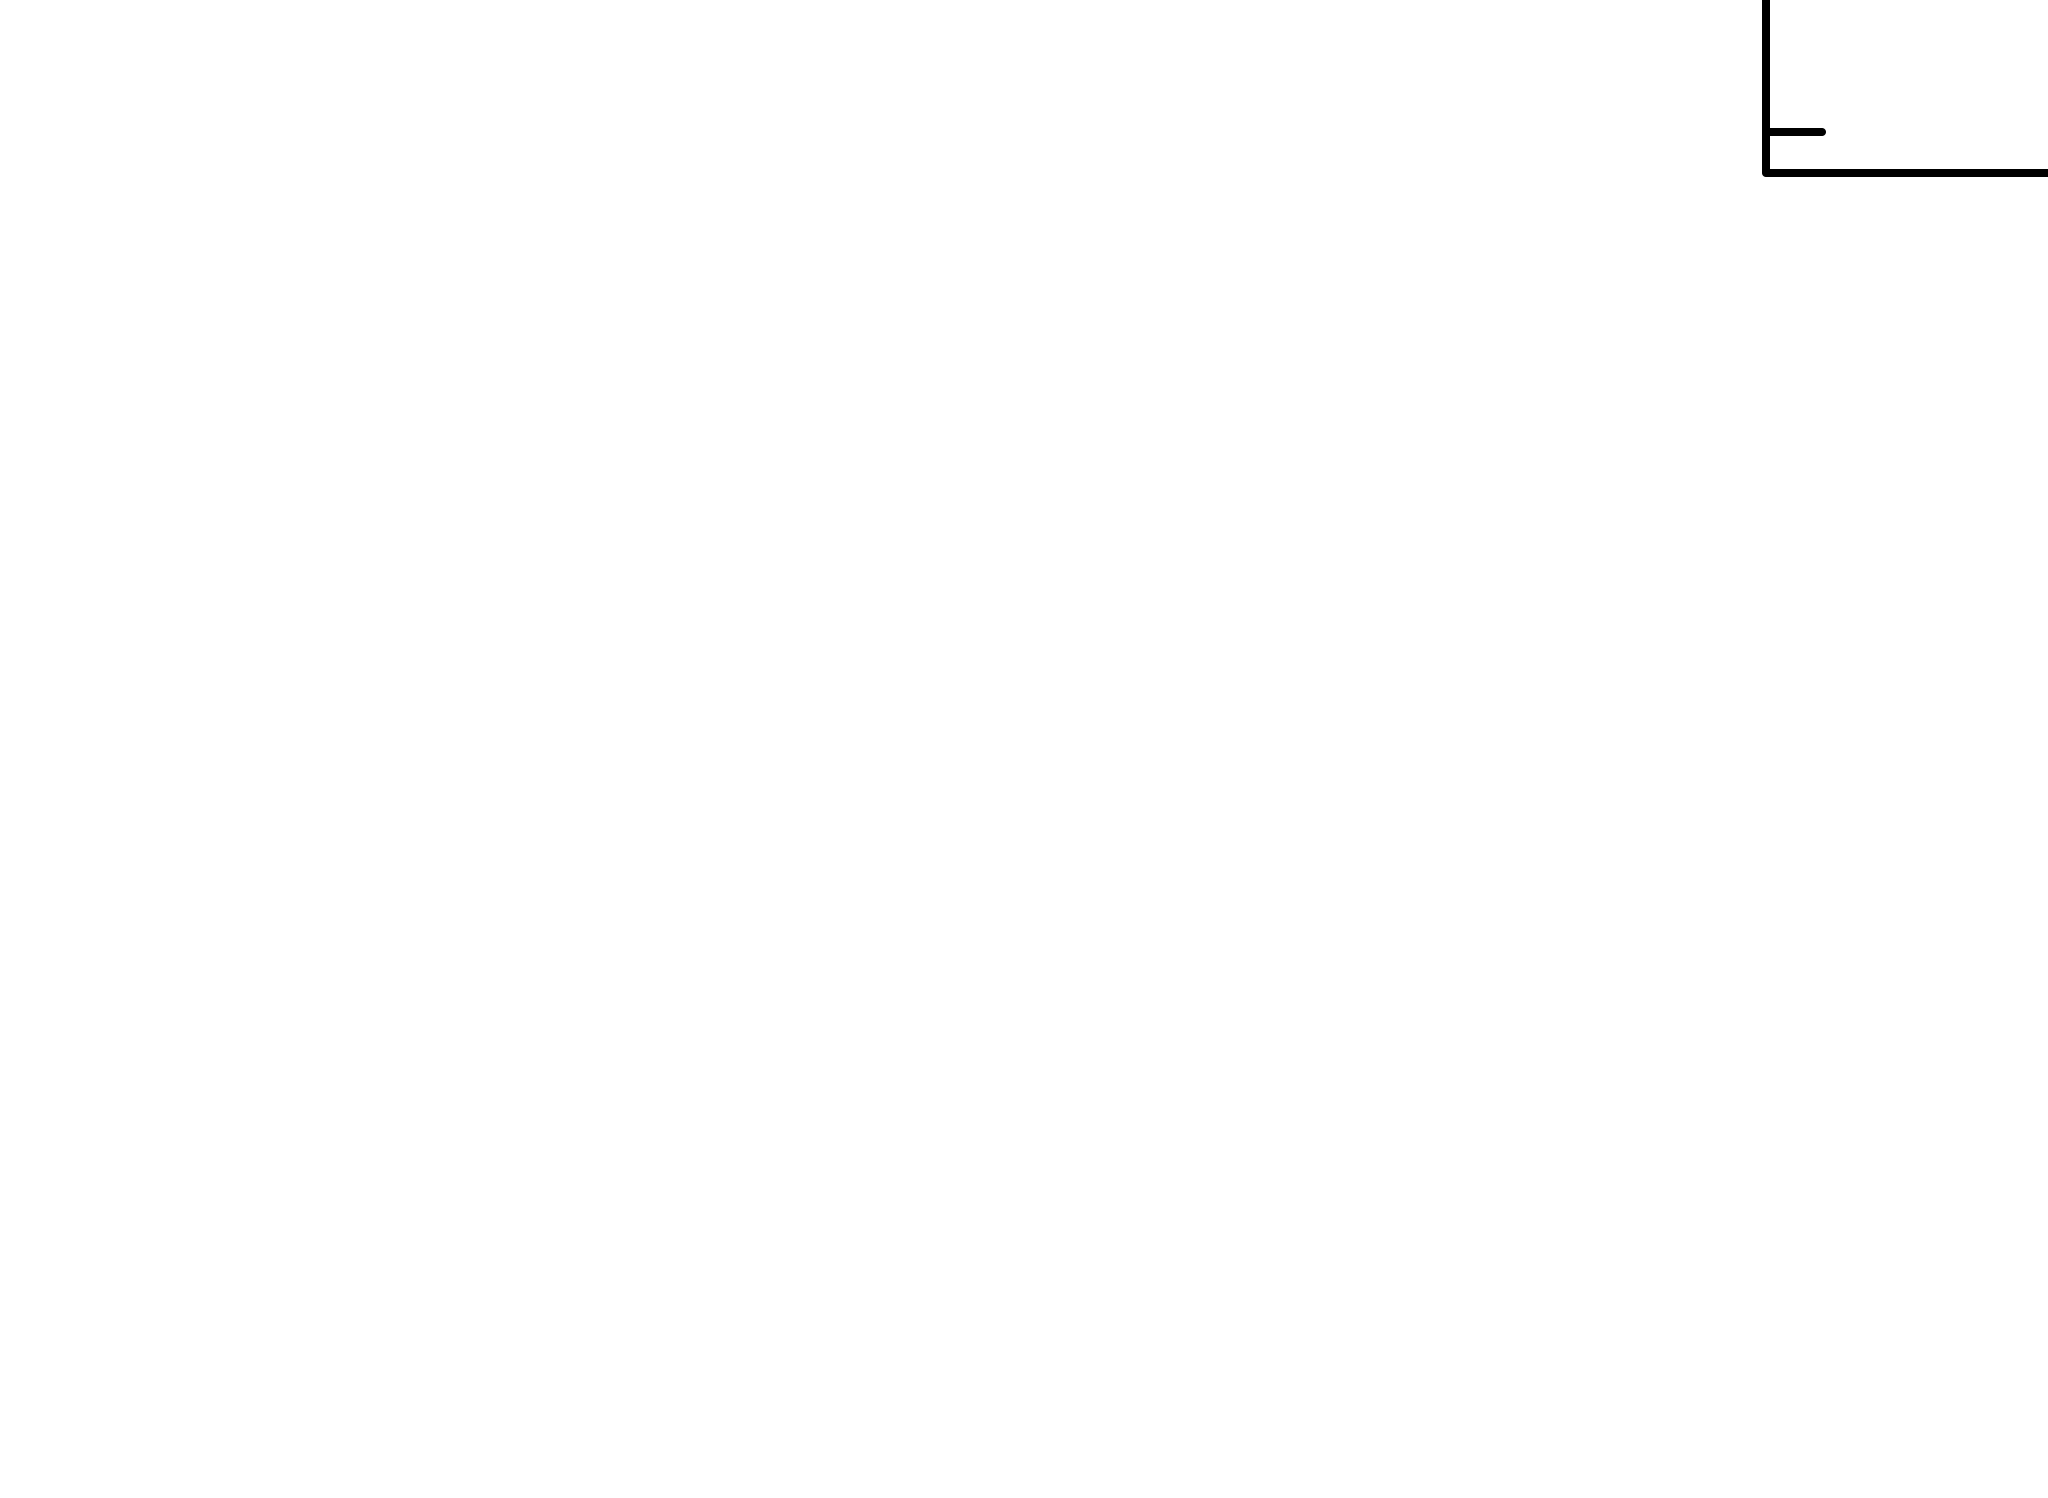

                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
1.17129      0.102728     -1      0.162425       3.31662   2.96456e-06
0.934368     123261       -2     0.0545934       3.39654   3.31630e-06
0.740129     95246        -3     0.0216141       3.08514   2.83313e-06
0.640743     93810.2      -4     0.0100626       2.86327   2.47925e-06
0.587096     95980.3      -5   0.000548320       2.77447   2.35870e-06
0.561628     92082.8      -6   3.46969e-05       2.70990   2.26620e-06
0.555282     90920.5      -7   3.83731e-06       2.69225   2.24060e-06
0.553741     90757.7      -8   1.58830e-08       2.68743   2.23331e-06
0.553294     90814.9      -9   9.91595e-10       2.68597   2.23106e-06
0.553139     90843       -10   6.15915e-11       2.68545   2.23027e-06
0.553073     90854.5     -11   3.49523e-12       2.68554   2.23058e-06
 Variances and Principal Axes
                 1        2        3  
 1.0392E-12| -0.0000  -0.0000   1

In [4]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

In [5]:
Fit.error("1")
Fit.error("2")

out_arr[0,0] = 'bbody'
out_arr[0,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[0,4:7] = mo.bbody.kT.values[0], mo.bbody.kT.values[0] - mo.bbody.kT.error[0], mo.bbody.kT.error[1] - mo.bbody.kT.values[0]
out_arr[0,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
0.349757     0.134586      2   1.55425e-12       1.87200   1.25079e-06
 Variances and Principal Axes
                 1        2        3  
 2.5210E-13| -0.0000  -0.0000   1.0000  
 4.0337E-01|  0.9451   0.3267   0.0000  
 3.4182E+00| -0.3267   0.9451   0.0000  
----------------------------------------

  Covariance Matrix
        1           2           3   
   7.252e-01  -9.310e-01  -8.021e-07
  -9.310e-01   3.096e+00   3.354e-06
  -8.021e-07   3.354e-06   3.980e-12
------------------------------------

Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.55425E-12  +/-  0.851608     
   2    2   bbody      kT         keV      1.87200      +/-  1.75964      
   3    2   bbody      norm                1.25079E-06  +/-  1.99508E-06  

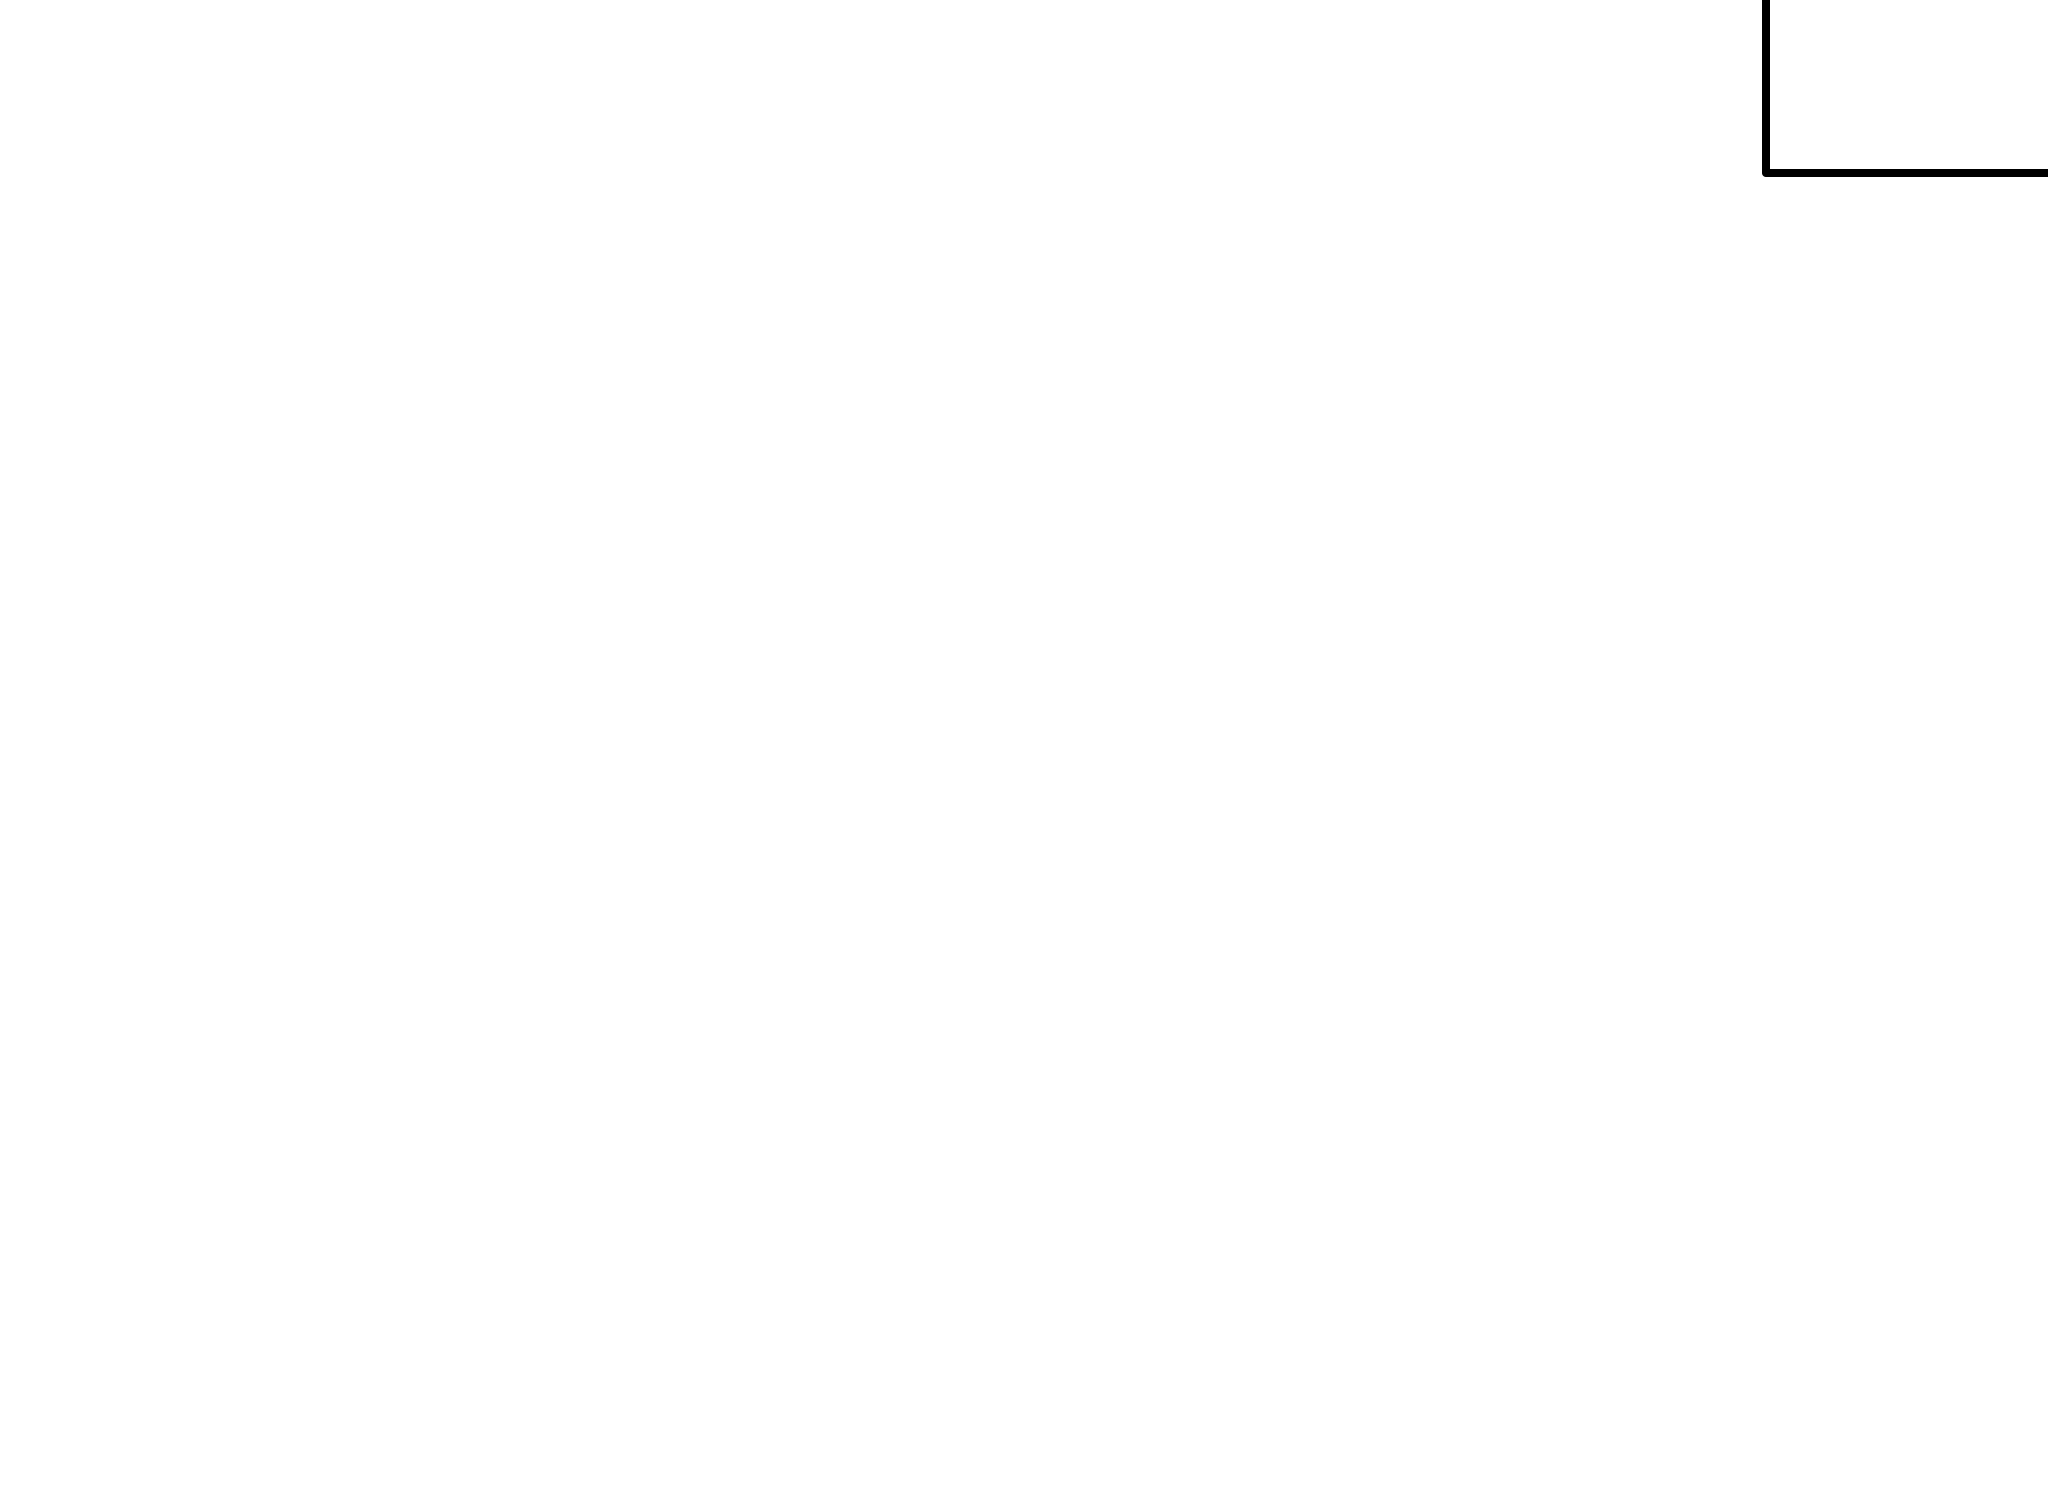


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.677341e+10     using 4 bins.

Test statistic : Chi-Squared              2.677341e+10     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
0.744306     0.0267015     0       1.01661       10.3986   1.41054e-05
0.635485     2389.43       0      0.971560       20.5331   1.38985e-05
0.597757     8729.06      -1      0.502212       87.9655   1.64198e-05
0.5

In [6]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

In [7]:
Fit.error("1")
Fit.error("2")

out_arr[3,0] = 'bremss'
out_arr[3,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[3,4:7] = mo.bremss.kT.values[0], mo.bremss.kT.values[0] - mo.bremss.kT.error[0], mo.bremss.kT.error[1] - mo.bremss.kT.values[0]
out_arr[3,-2:] = Fit.dof, Fit.statistic / Fit.dof



***XSPEC Error:  No variable parameters for fit 

 Parameter   Confidence Range (2.706)
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
0.474498     0.0230416     1      0.721304       109.803   1.87048e-05
0.474314     1061.42       1      0.721466       111.219   1.87067e-05
0.474264     1425.79       1      0.721589       111.744   1.87092e-05
 Variances and Principal Axes
                 1        2        3  
 5.9101E-11| -0.0000  -0.0000   1.0000  
 8.7194E-01|  1.0000   0.0004   0.0000  
 9.1263E+06| -0.0004   1.0000   0.0000  
----------------------------------------

  Covariance Matrix
        1           2           3   
   2.299e+00  -3.609e+03  -1.442e-04
  -3.609e+03   9.126e+06   3.837e-01
  -1.442e-04   3.837e-01   1.625e-08
------------------------------------

Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    0.721589     +/-  1.51627      
   2  


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              5.821308e+09     using 4 bins.

Test statistic : Chi-Squared              5.821308e+09     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
2.95053      0.501138     -1       1.02748       2.40514   1.8

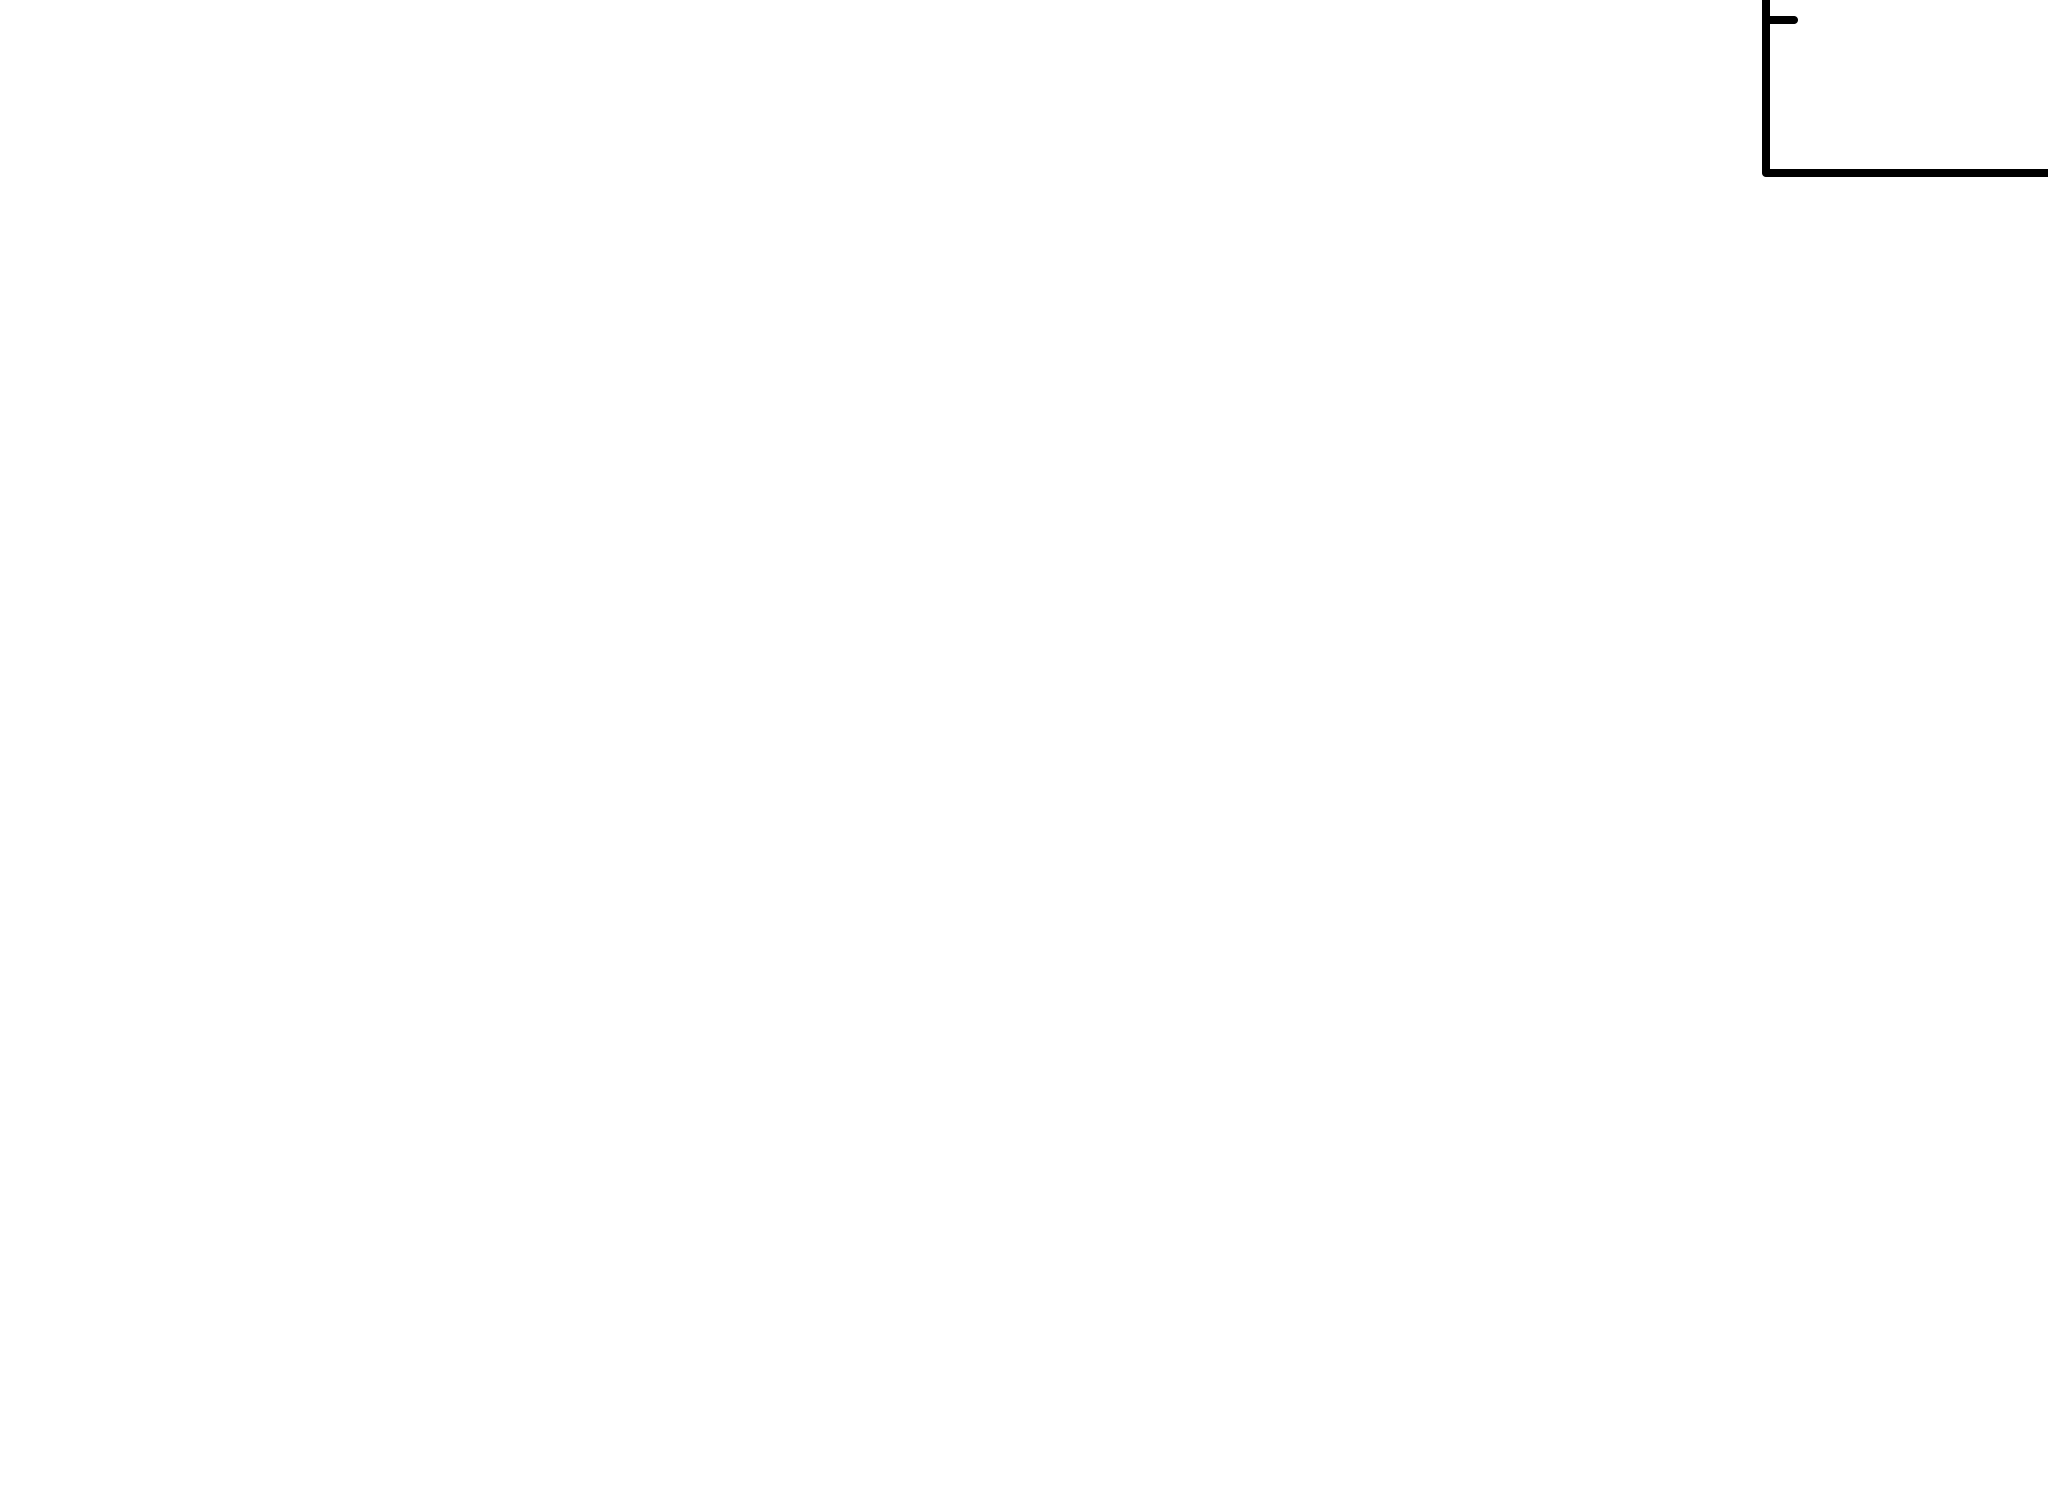

In [8]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [9]:
Fit.error("1")
Fit.error("2")

out_arr[2,0] = 'apec'
out_arr[2,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[2,13] = mo.apec.Abundanc.values[0]
out_arr[2,4:7] = mo.apec.kT.values[0], mo.apec.kT.values[0] - mo.apec.kT.error[0], mo.apec.kT.error[1] - mo.apec.kT.values[0]
out_arr[2,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
0.488135     0.0088189     0      0.793940       63.9980   4.86858e-05
 Variances and Principal Axes
                 1        2        5  
 3.9051E-10| -0.0000  -0.0000   1.0000  
 9.8668E-01|  1.0000   0.0009   0.0000  
 1.8772E+06| -0.0009   1.0000   0.0000  
----------------------------------------

  Covariance Matrix
        1           2           3   
   2.665e+00  -1.775e+03  -2.596e-04
  -1.775e+03   1.877e+06   2.966e-01
  -2.596e-04   2.966e-01   4.769e-08
------------------------------------

Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    0.793940     +/-  1.63263      
   2    2   apec       kT         keV      63.9980      +/-  1370.11      
   3    2   apec       Abundanc            1.00000      frozen
   4    2   


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.405691e+11     using 4 bins.

Test statistic : Chi-Squared              1.405691e+11     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
0.332067     0.0653067    -3      0.258457    0.00556962   1.67851e-06
0.127026     45715.3      -4     0.0415673     0.0765358   1.70863e-06
0.102633     54174.3      -5     0.0859465      0.208663   2.07421e-06
0

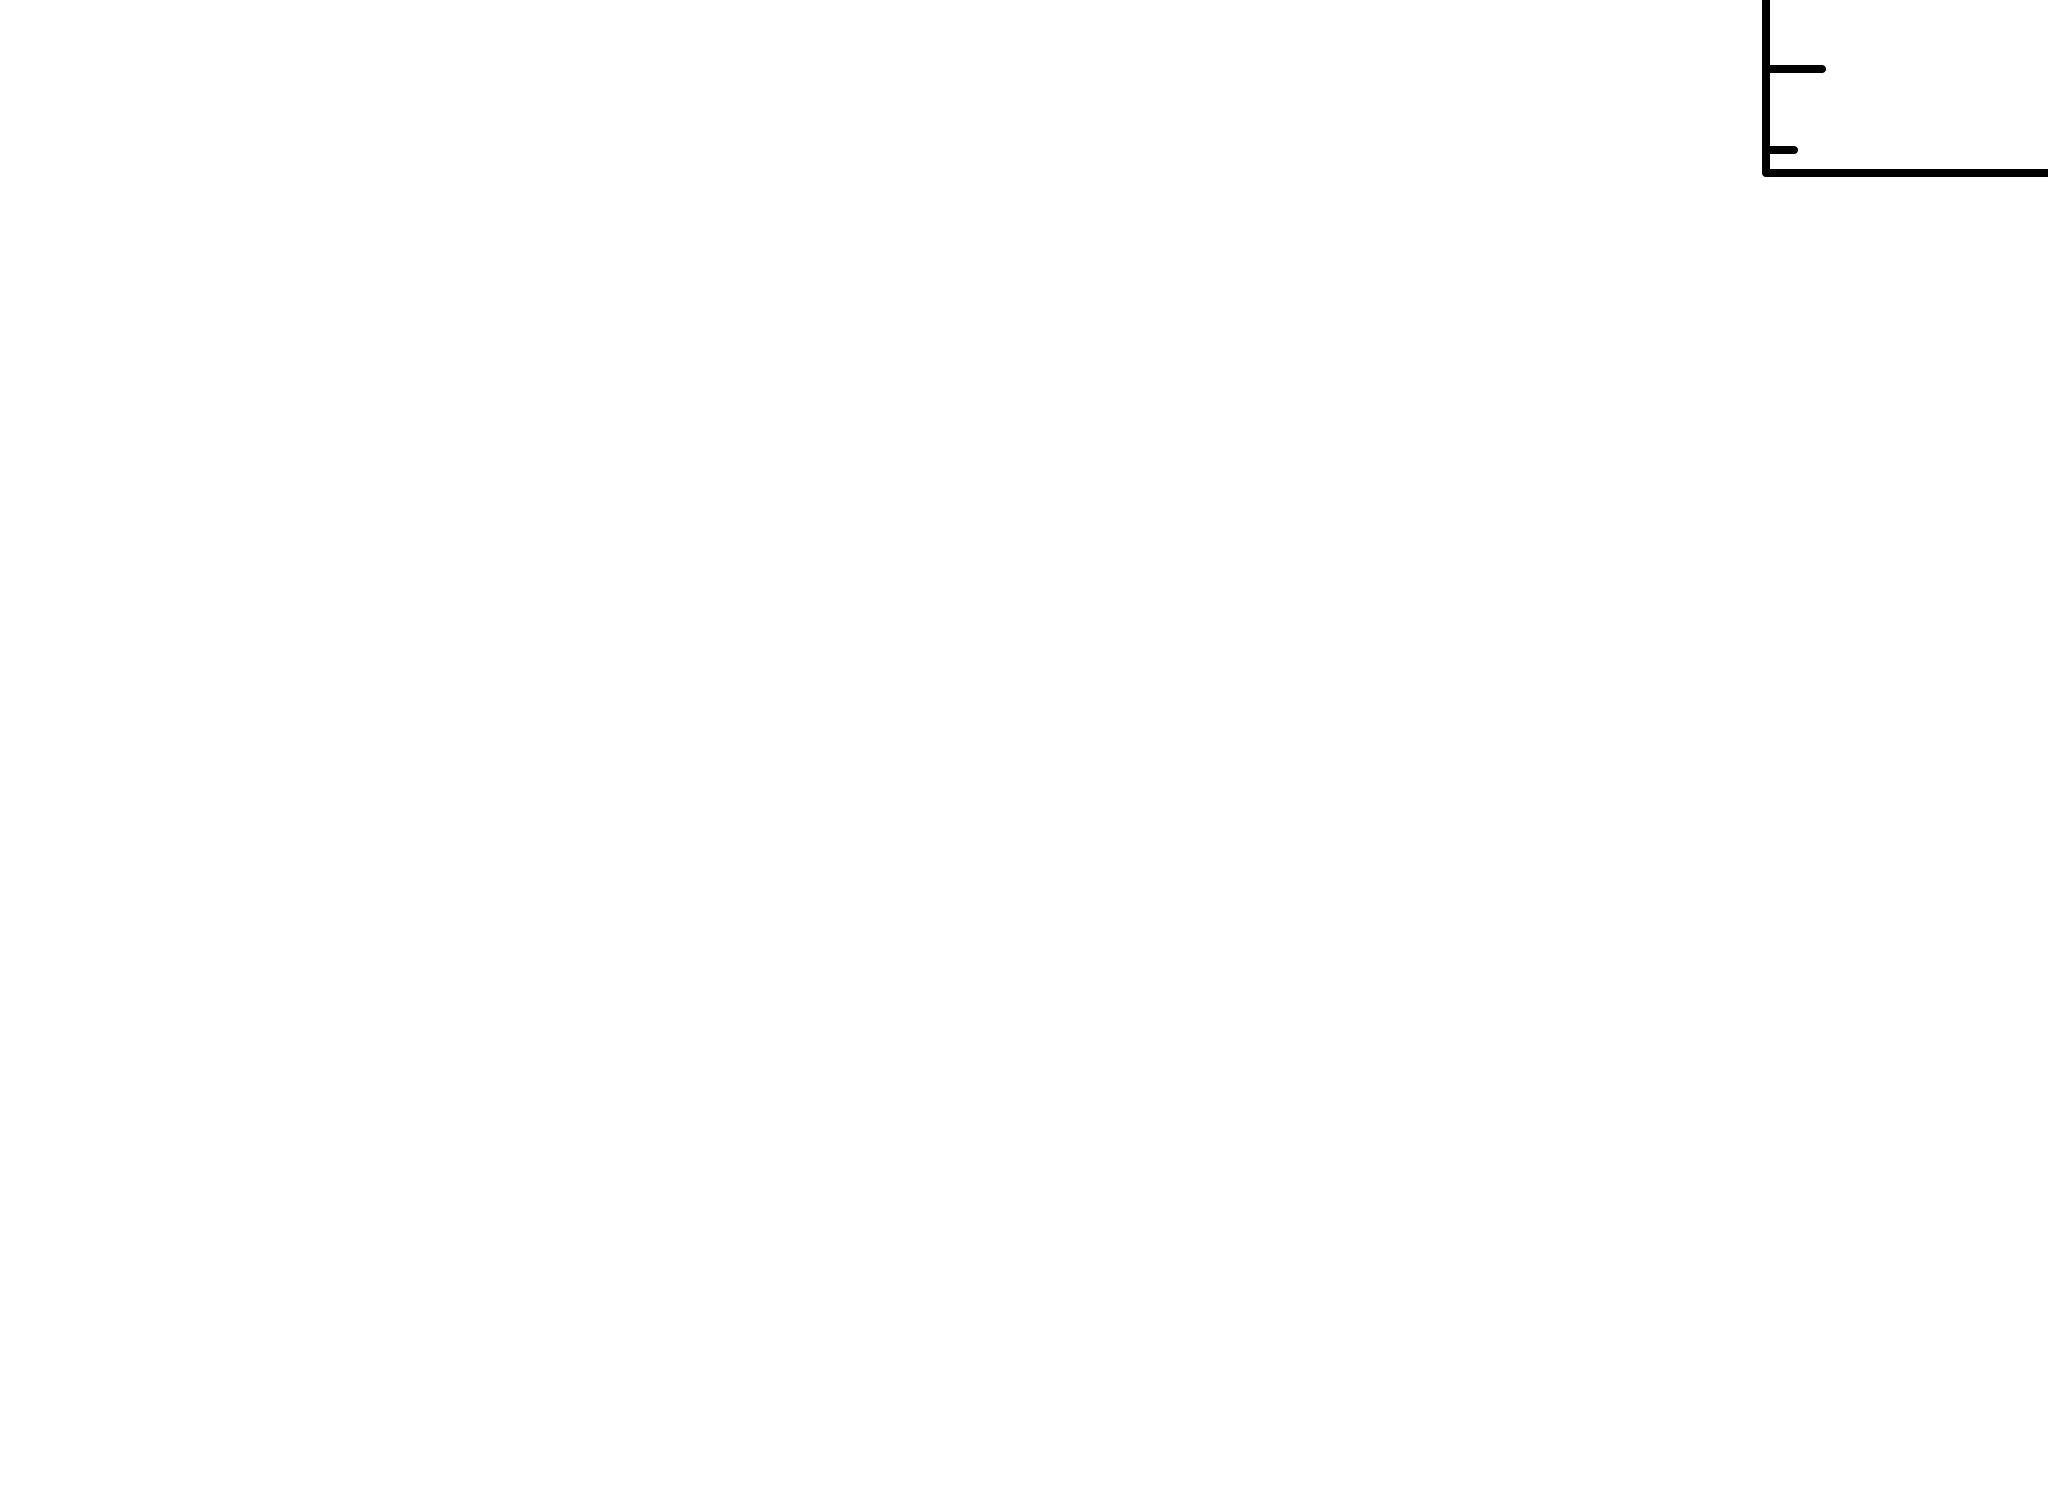

In [10]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

In [11]:
Fit.error("1")
Fit.error("2")

out_arr[1,0] = 'powerlaw'
out_arr[1,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[1,14:17] = mo.powerlaw.PhoIndex.values[0], mo.powerlaw.PhoIndex.values[0] - mo.powerlaw.PhoIndex.error[0], mo.powerlaw.PhoIndex.error[1] - mo.powerlaw.PhoIndex.values[0]
out_arr[1,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
***Warning: Parameter pegged at hard limit: 0
     1            0      13.8298    (-0.0932096,13.7366)
 Parameter   Confidence Range (2.706)

***Warning: Number of trials exceeded before convergence.
Current trial values 6.10833, 6.20863
and delta statistic 1.8745, 2.7259

Continue error search in this direction?      2     -1.83292      6.10964    (-2.05336,5.8892)


In [12]:
np.savetxt('../spec21_output.csv',out_arr,fmt=['%s','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.1f','%.2f','%.2f','%.2f','%i','%.2f'],delimiter=',')


In [13]:
AllModels.calcFlux(".2 12.0")

 Model Flux 1.6948e-05 photons (1.5894e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [14]:
#plx = 0.5317
d_kpc = 8
F_x = 1.5895*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

1.216807811529728e+33


In [15]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

8
33.085221989090115


In [16]:
F_opt = 1.05*10**-5 * 10**(-0.4*20.23)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  8.495506941373005e-14
F_x / F_opt:  0.2720712331808541



Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              5.821308e+09     using 4 bins.

Test statistic : Chi-Squared              5.821308e+09     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.087355e+09     using 4 bins.

Test statistic : Chi-Squared              1.087355e+09     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees o

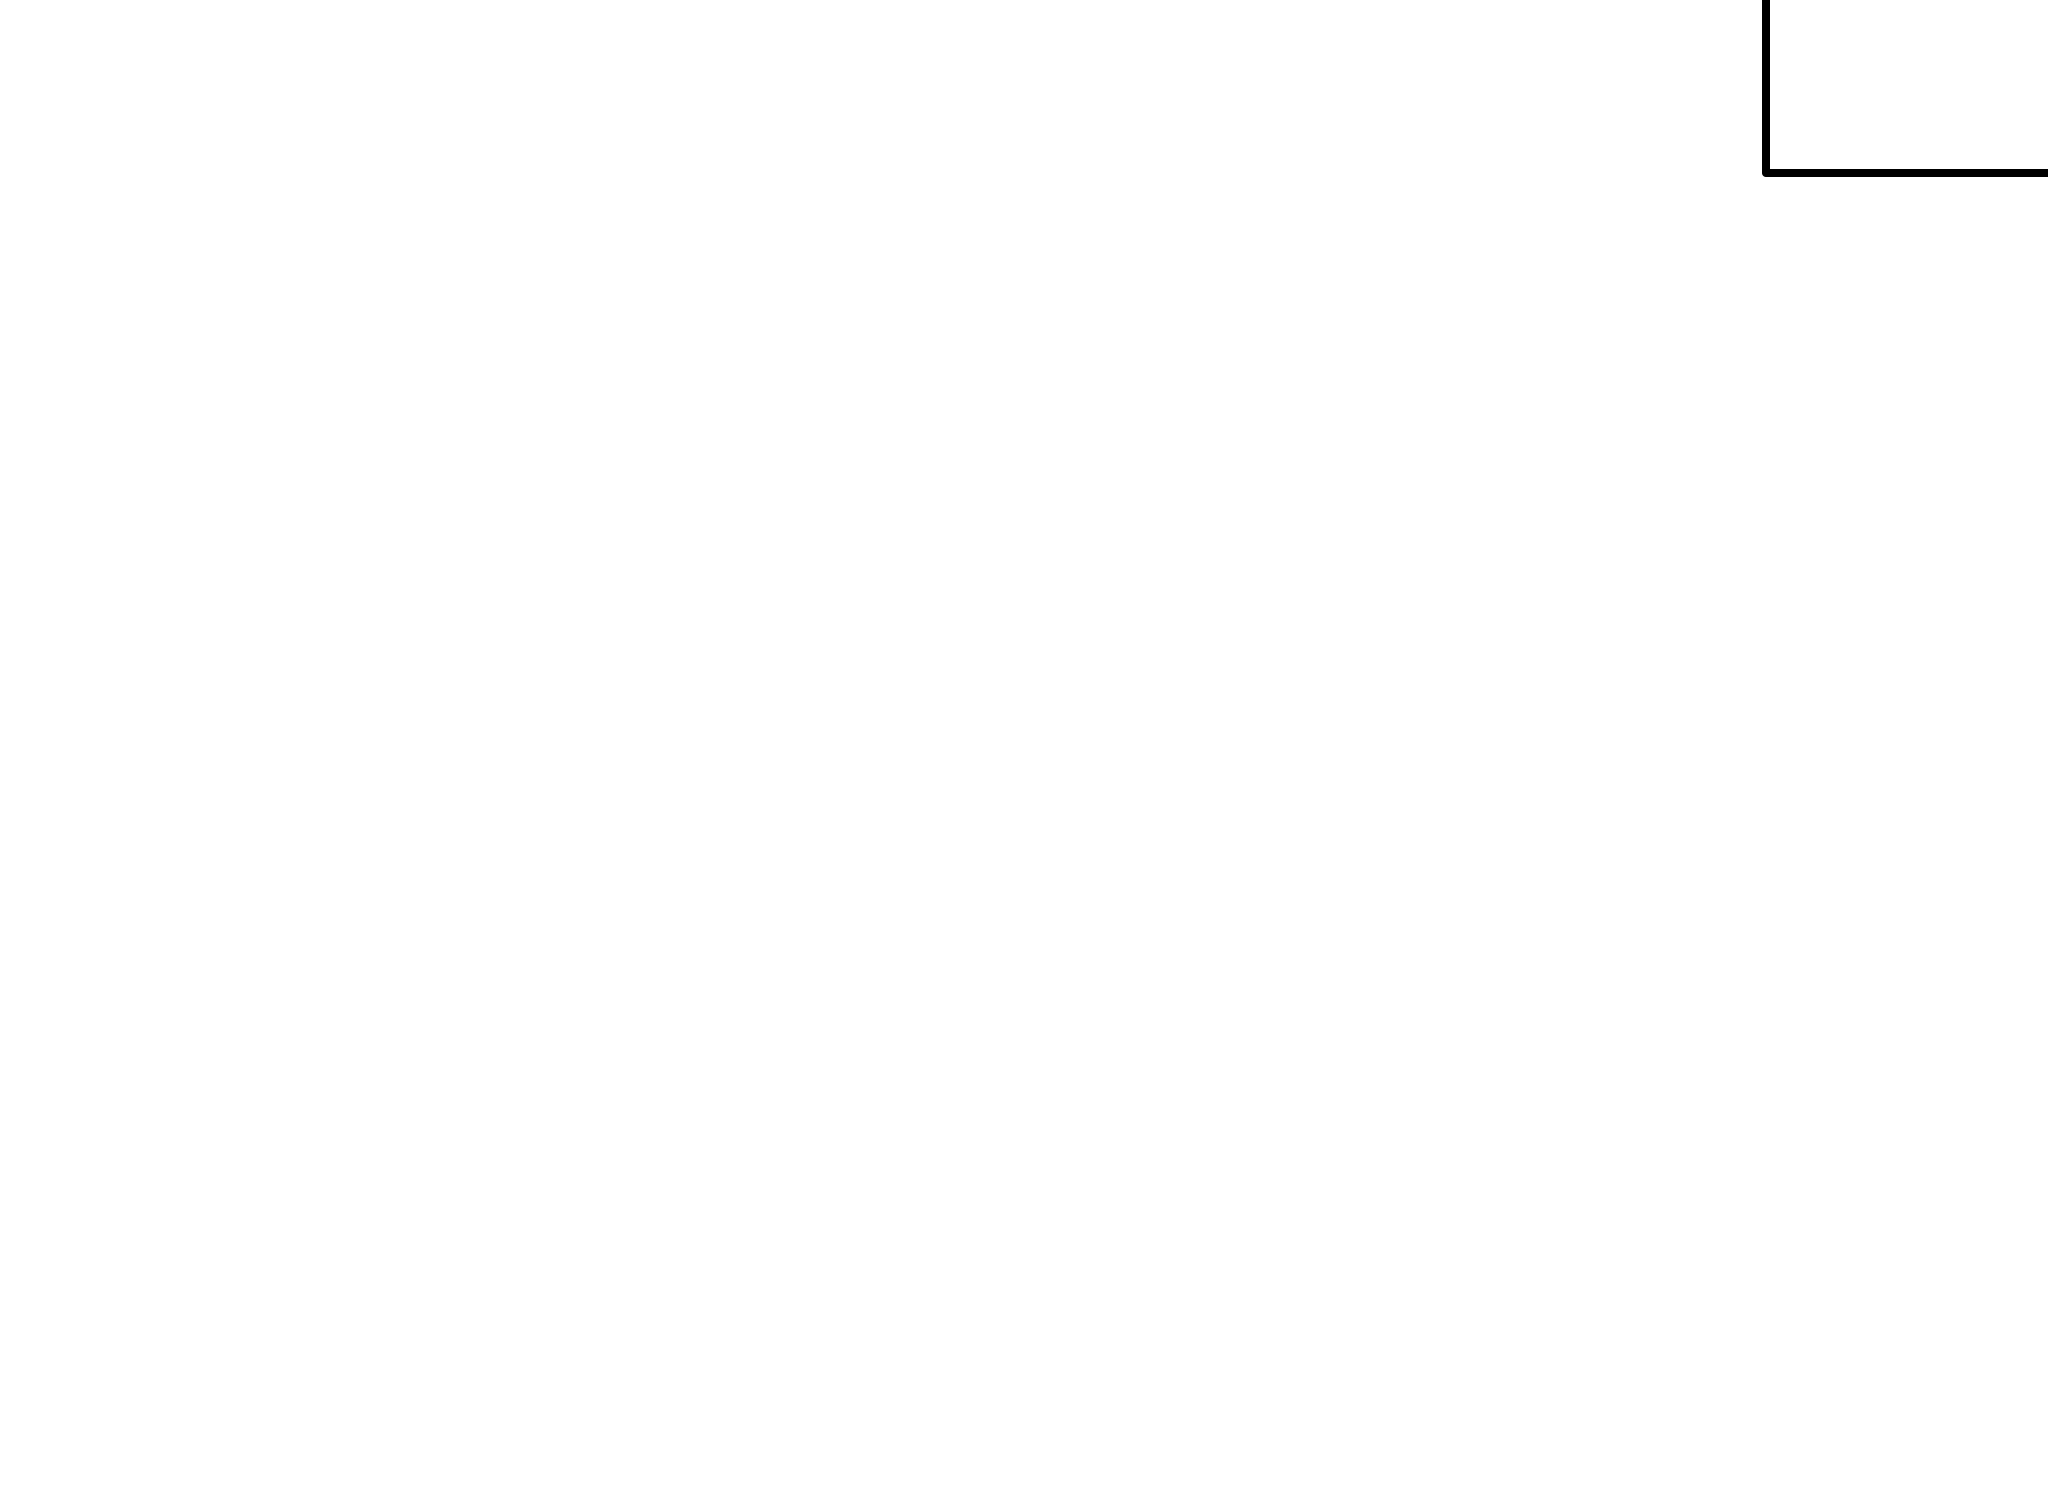

  Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    0.797866     +/-  1.56053      
   2    2   apec       kT         keV      64.0000      +/-  2371.27      
   3    2   apec       Abundanc            0.300000     frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                5.31831E-05  +/-  2.07823E-04  
________________________________________________________________________


Fit statistic  : Chi-Squared                  0.4963     using 4 bins.

Test statistic : Chi-Squared                  0.4963     using 4 bins.
 Null hypothesis probability of 4.8114e-01 with 1 degrees of freedom


In [17]:
AllModels.clear()
mo = Model("tbabs*apec")
mo.apec.Abundanc = 0.3
Fit.perform()
Plot("data resid")


Model TBabs<1>*raymond<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   raymond    kT         keV      1.00000      +/-  0.0          
   3    2   raymond    Abundanc            1.00000      frozen
   4    2   raymond    Redshift            0.0          frozen
   5    2   raymond    norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.970395e+09     using 4 bins.

Test statistic : Chi-Squared              3.970395e+09     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              8.313618e+08     using 4 bins.

Test statistic : Chi-Squared              8.313618e+08     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degree

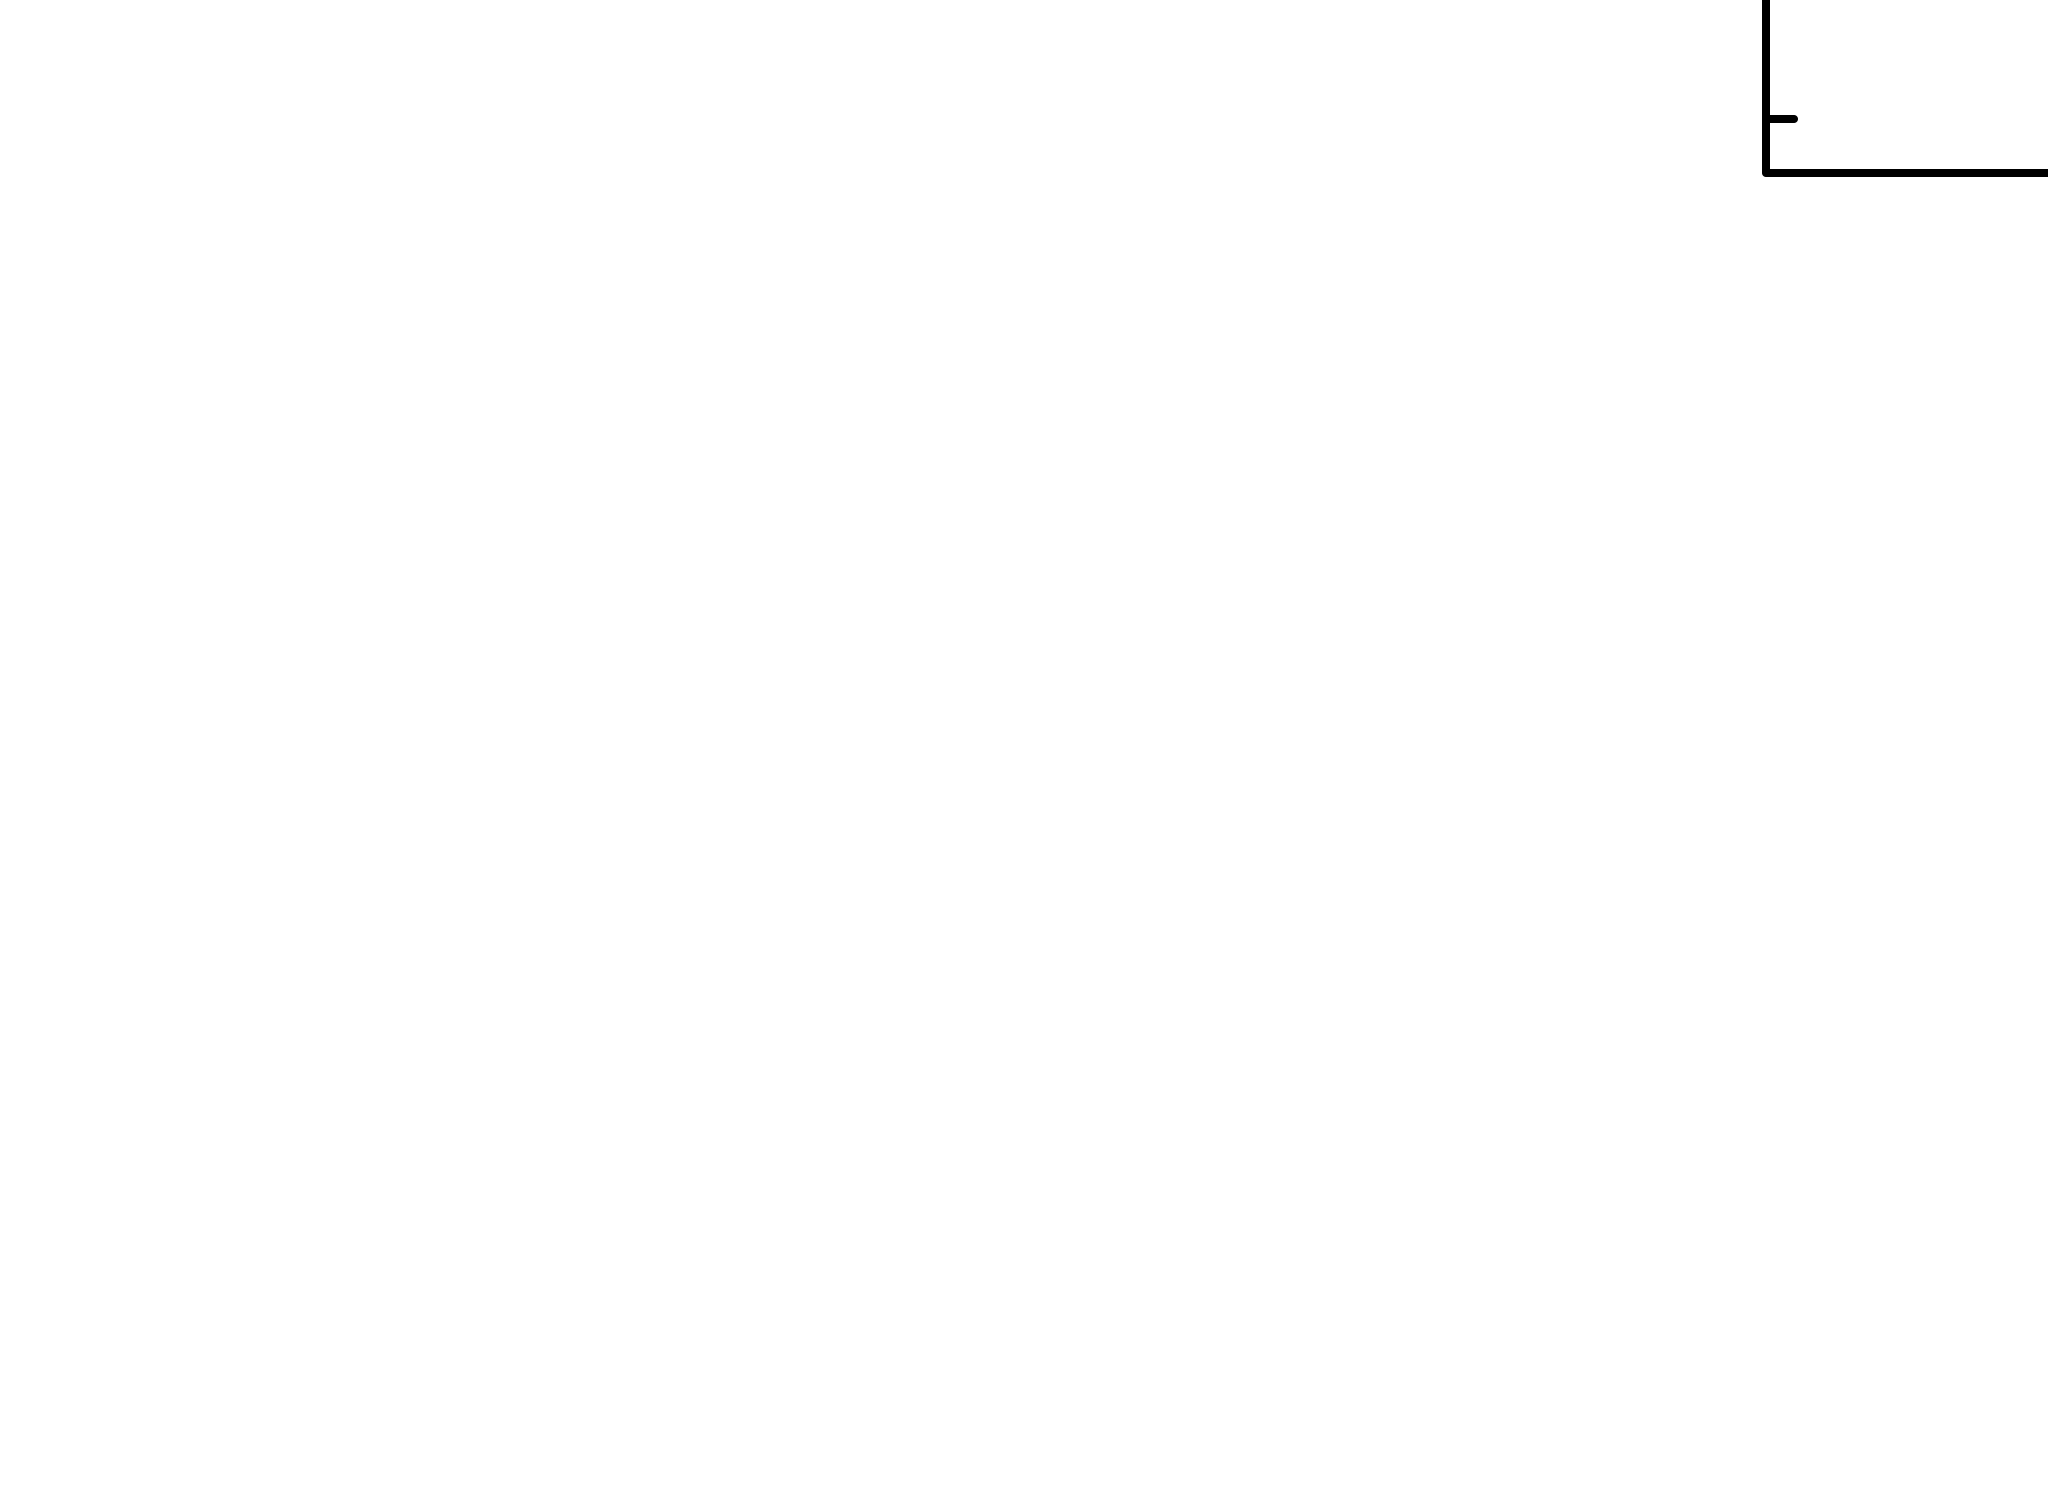

In [18]:
AllModels.clear()
mo = Model("tbabs*raymond")
mo.raymond.Abundanc = 0.3
mo.raymond.kT = 30
Fit.perform()
Plot("data resid")